# Perceptron intuition
Several binary classifiers are learned under supervision using a linear machine learning technique called a perceptron. This method allows neural networks to prepare by learning new components and processing them one at a time. In this lesson, "Perceptron in Machine Learning," we will go over a detailed explanation of Perceptron along with a synopsis of its core functions. Let's start with a quick synopsis of Perceptron.

# Pseudocode of the algorithm


1.   Set the bias and weights to modest, random initial values.
2.   For every training instance:
    *   Subtract the bias term from the weighted sum of the inputs, which is z = w₁x₁ + w₂x₂ +... + wₙxₙ + b.
3.   Use an activation function (a step function is common):
    *   Predict class 1 if z > 0.
    *   Predict class 0 if z <= 0.
4.   Revise the mass values:
    *   Do nothing if the forecast comes true.
    *   Use the update rule to adjust the weights and bias if the prediction proves to be inaccurate.
    *   For any weight wᵢ, wᵢ → wᵢ + α(y - Ϸ)xᵢ.
    *   b ↞ b + α(y - Ϸ) to account for bias b.
5.   Where y is the true label, Ϸ is the projected label, and α represents the learning rate.
6.   For a predetermined number of iterations or until convergence, repeat steps two and three.
7.   Initialize weights and bias to small random values
8.   For each training example: Compute the weighted sum of inputs plus the bias term: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b Apply the activation function: If z > 0, predict class 1 If z ≤ 0, predict class 0.



# Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.num_iterations):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias > 0 else 0

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))

        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([self.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors=['black'], linewidths=1)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend(loc='upper right')
        plt.title('Perceptron Decision Boundary')
        plt.show()

# Perceptron Class Definition:

*   The Perceptron class is defined by the two properties, num_iterations and learning_rate.
*   Learning_rate controls the step size while changing weights during training.
*   Num_iterations specifies how many times the algorithm runs over the training set.

# Model Training (fit method):


*   The algorithm goes over the data for the predetermined number of times, changing bias and weights with each iteration based on prediction mistakes.
*   For training, the fit approach uses the input characteristics X and the matching target labels y.
*   The bias and weights are initialized.




# Prediction


*   The input vector x is used with the predict algorithm.
*   After adding the bias and computing the dot product of the input characteristics and weights, it determines if the outcome is larger than zero.
*   It predicts class 1 if true, and class 0 if false.


# Decision Boundary Plotting (plot_decision_boundary method):


*   This method displays the decision boundary of the perceptron using a 2D feature space.
*   A scatter plot is created using the data points, showing class 0 in blue and class 1 in red.
*   The decision boundary is then computed and shown based on the model's predictions.

In [3]:
X = np.array([[2, 3], [1, 2], [3, 3], [5, 5], [6, 5], [3, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

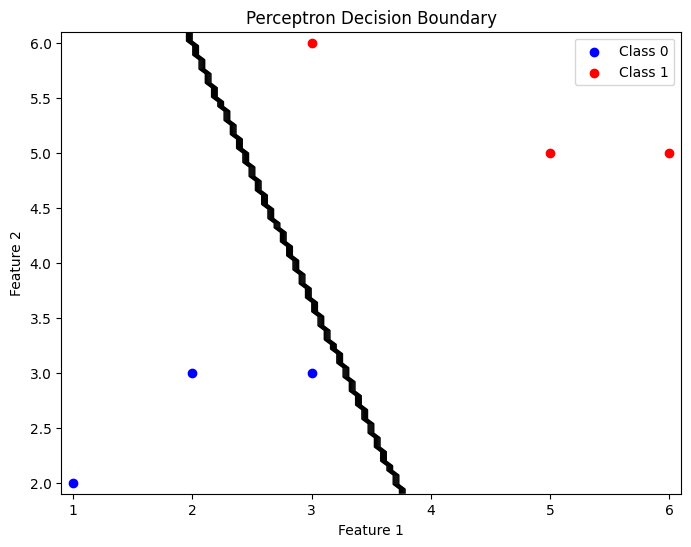

In [4]:
perceptron = Perceptron(learning_rate=0.1, num_iterations=1000)
perceptron.fit(X, y)
perceptron.plot_decision_boundary(X, y)

We depict the decition boundary that the perceptron has learnt as well as give the parameters of the learning model—in this example, a learning rate of 1.

The core perceptron implementation is provided by the fit and forecast algorithms. The fit strategy adjusts the forecasts depending on error, whereas the forecast technique uses these weights and bias to produce predictions.

# Loss + Optimization function.
The Perceptron method is typically not associated with an optimization function and loss function in the same way as certain other machine learning methods, such as gradient descent-based neural network training approaches or linear regression.

**Loss function:**

*   The learning procedure in conventional machine learning algorithms, such as the Perceptron, is not predicated on minimizing a continuous loss function. Rather, it functions by discretely updating the weights and bias of the model depending on the accuracy of a prediction.
*   The Perceptron's update rule is straightforward: if the forecast is accurate, there is no update; if the prediction is off, the weights are modified using the input characteristics and a specified learning rate.
*   Unlike in gradient-based optimization, there isn't a continuously differentiable loss function.

**Optimization function:**
*   Unlike gradient-based methods, the Perceptron does not require an explicit optimization function. Reducing a cost function does not involve calculating gradients and following protocols.
*   The Perceptron updates weights repeatedly until a decision boundary is created in order to find a hyperplane that separates the classes.